## How to use this script
1. Export your ChatGPT conversations. From your ChatGPT account, go to Settings -> Data controls -> Export
2. Unzip the data export
3. Point `convo_folder` to your exported data folder
4. Change `local_tz` to your local timezone so that it gets the correct timestamp of each conversation.

In [1]:
# Notebok imports

import json
import pytz
from datetime import datetime, timezone, timedelta
import matplotlib.dates as mdates
import matplotlib.patches as patches
import matplotlib.pyplot as plt
import numpy as np

from collections import Counter
from helper_functions import unzip_data

In [12]:
file = unzip_data('data/data.zip', 'data')

convo_folder = 'data' # change to where your exported ChatGPT folder is 
local_tz = 'Africa/Lagos' # change to your local timezone.
# pytz.all_timezones # uncomment to see a list of all supported timezones.

In [23]:
# get user

with open(f'{convo_folder}/user.json', 'r') as f:
    user_data = json.load(f)
    

print(user_data['id'])
print(user_data['email'])
print(user_data['phone_number'])
print(user_data['chatgpt_plus_user'])

user-OXbpCKd3x4pp3RdJkmFiVthu
onyedikachi1997@gmail.com
+2348129944424
False


In [6]:
pytz.all_timezones[:10]

['Africa/Abidjan',
 'Africa/Accra',
 'Africa/Addis_Ababa',
 'Africa/Algiers',
 'Africa/Asmara',
 'Africa/Asmera',
 'Africa/Bamako',
 'Africa/Bangui',
 'Africa/Banjul',
 'Africa/Bissau']

In [4]:
with open(f'{convo_folder}/conversations.json', 'r') as f:
    convs = json.load(f)

In [5]:
convo_times = []
for conv in convs:
    # Given Unix timestamp
    unix_timestamp = conv['create_time']

    # Convert to UTC datetime
    utc_datetime = datetime.fromtimestamp(unix_timestamp, tz=timezone.utc)

    # Convert UTC datetime to local timezone
    pt_datetime = utc_datetime.astimezone(pytz.timezone(local_tz))
    convo_times.append(pt_datetime)

In [6]:
def create_year_heatmap(convo_times, year):
    # Convert convo_times to dates and filter for the given year
    just_dates = [convo.date() for convo in convo_times if convo.year == year]

    date_counts = Counter(just_dates)

    # Create a full year date range for the calendar
    start_date = datetime(year, 1, 1).date()
    end_date = datetime(year, 12, 31).date()

    total_days = (end_date - start_date).days + 1
    date_range = [start_date + timedelta(days=i) for i in range(total_days)]

    # Prepare data for plotting
    data = []
    for date in date_range:
        week = ((date - start_date).days + start_date.weekday()) // 7
        day_of_week = date.weekday()
        count = date_counts.get(date, 0)
        data.append((week, day_of_week, count))

    weeks_in_year = (end_date - start_date).days // 7 + 1

    # Plot the heatmap
    plt.figure(figsize=(15, 8))
    ax = plt.gca()
    ax.set_aspect('equal')

    max_count_date = max(date_counts, key=date_counts.get)
    max_count = date_counts[max_count_date]
    p90_count = np.percentile(list(date_counts.values()), 90)
    for week, day_of_week, count in data:
        color = plt.cm.Greens((count + 1) / p90_count) if count > 0 else 'lightgray'
        rect = patches.Rectangle((week, day_of_week), 1, 1, linewidth=0.5, edgecolor='black', facecolor=color)
        ax.add_patch(rect)

    # Replace week numbers with month names below the heatmap
    month_starts = [start_date + timedelta(days=i) for i in range(total_days)
                    if (start_date + timedelta(days=i)).day == 1]
    for month_start in month_starts:
        week = (month_start - start_date).days // 7
        plt.text(week + 0.5, 7.75, month_start.strftime('%b'), ha='center', va='center', fontsize=10, rotation=0)

    # Adjustments for readability
    ax.set_xlim(-0.5, weeks_in_year + 0.5)
    ax.set_ylim(-0.5, 8.5)
    plt.title(
        f'{year} ChatGPT Conversation Heatmap (total={sum(date_counts.values())}).\nMost active day: {max_count_date} with {max_count} convos.',
        fontsize=16
    )
    plt.xticks([])
    plt.yticks(range(7), ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
    plt.gca().invert_yaxis()
    plt.show()

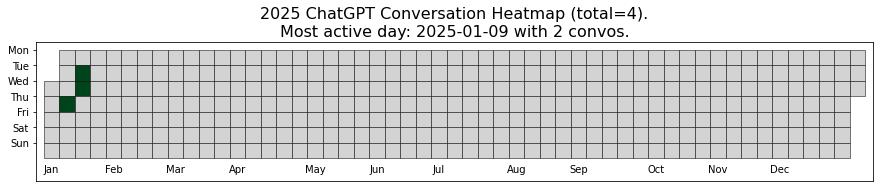

In [7]:
create_year_heatmap(convo_times, 2025)

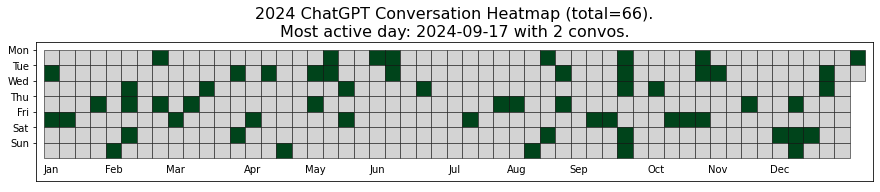

In [8]:
create_year_heatmap(convo_times, 2024)

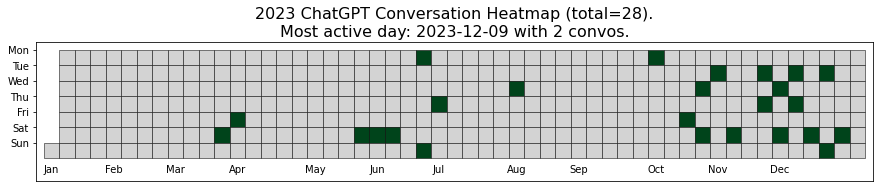

In [9]:
create_year_heatmap(convo_times, 2023)

In [25]:
convo_times[:5]

[datetime.datetime(2025, 1, 15, 4, 12, 28, 104290, tzinfo=<DstTzInfo 'Africa/Lagos' WAT+1:00:00 STD>),
 datetime.datetime(2025, 1, 14, 14, 36, 36, 21635, tzinfo=<DstTzInfo 'Africa/Lagos' WAT+1:00:00 STD>),
 datetime.datetime(2024, 9, 21, 3, 50, 5, 921374, tzinfo=<DstTzInfo 'Africa/Lagos' WAT+1:00:00 STD>),
 datetime.datetime(2024, 8, 11, 1, 13, 8, 761924, tzinfo=<DstTzInfo 'Africa/Lagos' WAT+1:00:00 STD>),
 datetime.datetime(2025, 1, 9, 16, 7, 31, 856269, tzinfo=<DstTzInfo 'Africa/Lagos' WAT+1:00:00 STD>)]

In [51]:
# Convert convo_times to dates and filter for the given year
year = 2025
just_dates = [convo.date() for convo in convo_times if convo.year == year]

date_counts = Counter(just_dates)

# Create a full year date range for the calendar
start_date = datetime(year, 1, 1).date()
end_date = datetime(year, 12, 31).date()

total_days = (end_date - start_date).days + 1
date_range = [start_date + timedelta(days=i) for i in range(total_days)]

# Prepare data for plotting
data = []
for date in date_range:
    week = ((date - start_date).days + start_date.weekday()) // 7
    day_of_week = date.weekday()
    count = date_counts.get(date, 0)
    data.append((week, day_of_week, count))

print(data[:16])
p
weeks_in_year = (end_date - start_date).days // 7 + 1
max_count_date = max(date_counts, key=date_counts.get)
max_count = date_counts[max_count_date]

[(0, 2, 0), (0, 3, 0), (0, 4, 0), (0, 5, 0), (0, 6, 0), (1, 0, 0), (1, 1, 0), (1, 2, 0), (1, 3, 2), (1, 4, 0), (1, 5, 0), (1, 6, 0), (2, 0, 0), (2, 1, 1), (2, 2, 1), (2, 3, 0)]
